<a href="https://colab.research.google.com/github/aglucaci/Bioinformatics-For-All--Plots/blob/master/Bioinformatics_For_All_R_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“Computation failed in `stat_signif()`.
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”


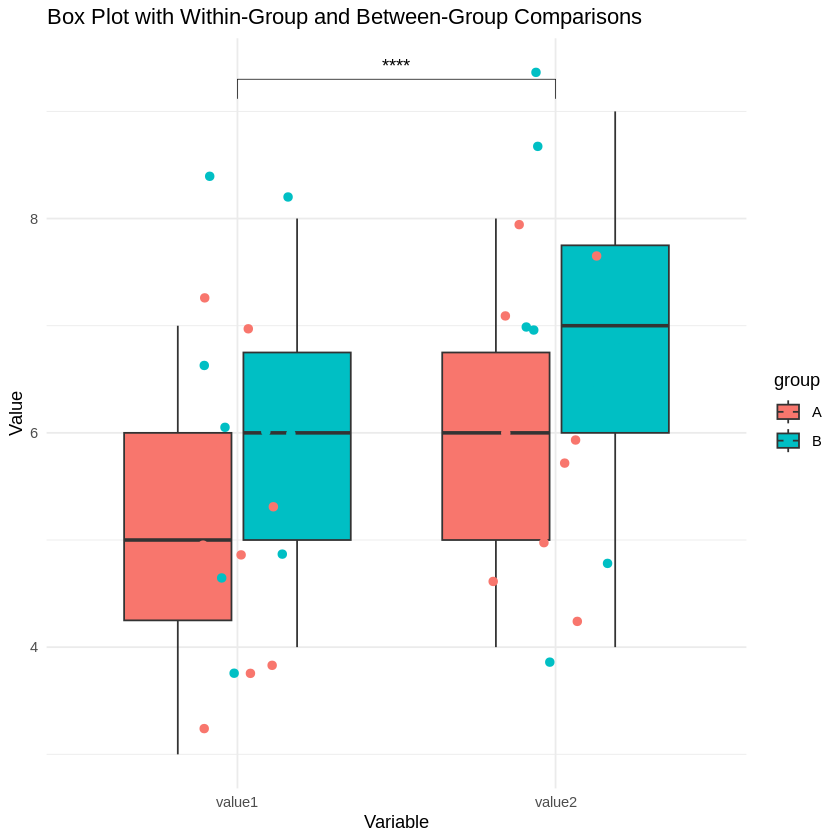

In [ ]:
# Install and load required packages
install.packages("ggplot2")
install.packages("ggpubr")
install.packages("tidyr")

library(ggplot2)
library(ggpubr)
library(tidyr)

# Example data with two conditions
data <- data.frame(
  subject = factor(1:20),
  group = rep(c("A", "B"), each = 10),
  value1 = c(5, 3, 6, 4, 5, 7, 4, 6, 5, 7, 6, 4, 5, 5, 6, 8, 5, 7, 6, 8),
  value2 = c(6, 4, 5, 5, 6, 8, 5, 7, 6, 8, 7, 5, 4, 6, 7, 9, 6, 8, 7, 9)
)

# Reshape data for ggplot2 using tidyr
data_long <- data %>%
  pivot_longer(cols = c(value1, value2), names_to = "variable", values_to = "value")

# Create the box plot
p <- ggplot(data_long, aes(x = variable, y = value, fill = group)) +
  geom_boxplot() +
  geom_jitter(position = position_jitter(0.2), aes(color = group), size = 2) +
  theme_minimal() +
  labs(title = "Box Plot with Within-Group and Between-Group Comparisons",
       x = "Variable",
       y = "Value")

# Define within-group comparisons
within_comparisons <- list(
  c("value1", "value2")
)

# Define between-group comparisons for each condition
between_comparisons <- list(
  c("A", "B")
)

# Add within-group comparison bars (for value1 vs. value2 within each group)
p <- p + stat_compare_means(aes(group = group), comparisons = within_comparisons,
                            method = "t.test", paired = TRUE, label = "p.signif",
                            bracket.size = 0.2, step.increase = 0.1)

# Add between-group comparison bars (for group A vs. group B within each condition)
p + stat_compare_means(aes(x = variable, y = value, fill = group, group = group),
                       comparisons = between_comparisons,
                       method = "t.test", label = "p.signif",
                       bracket.size = 0.2, step.increase = 0.2,
                       position = position_dodge(0.8))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



            Df Sum Sq Mean Sq F value  Pr(>F)   
group        2  12.24   6.122   6.435 0.00518 **
Residuals   27  25.68   0.951                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ group, data = data)

$group
         diff         lwr      upr     p adj
B-A 1.1339963  0.05254072 2.215452 0.0384525
C-A 1.5008155  0.41935988 2.582271 0.0052283
C-B 0.3668192 -0.71463643 1.448275 0.6812485



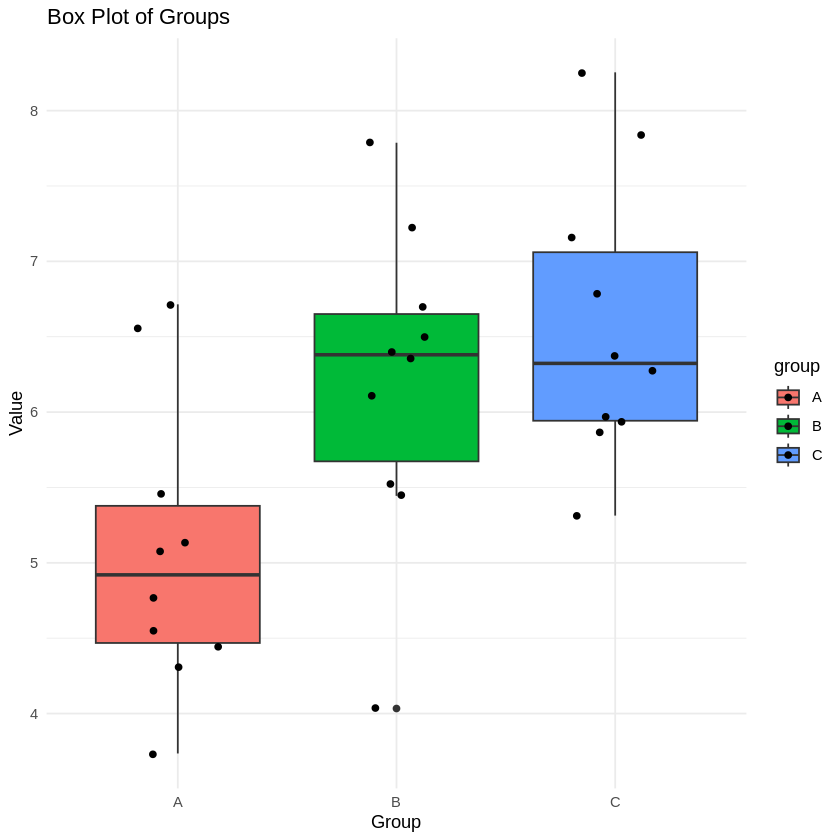

In [ ]:
# Install and load required packages
install.packages("ggplot2")

library(ggplot2)

# Example data
set.seed(123) # For reproducibility
data <- data.frame(
  group = factor(rep(c("A", "B", "C"), each = 10)),
  value = c(rnorm(10, mean = 5, sd = 1),  # Group A
            rnorm(10, mean = 6, sd = 1),  # Group B
            rnorm(10, mean = 7, sd = 1))  # Group C
)

# Perform ANOVA
anova_result <- aov(value ~ group, data = data)

# Display the summary of the ANOVA
summary(anova_result)

# Perform Tukey HSD post-hoc test
tukey_result <- TukeyHSD(anova_result)

# Display Tukey HSD results
print(tukey_result)

# Create a box plot
ggplot(data, aes(x = group, y = value, fill = group)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Box Plot of Groups", x = "Group", y = "Value") +
  geom_jitter(width = 0.2)
